# Introducción al Análisis Exploratorio de Datos (EDA)

#### Propósitos del EDA
El análisis exploratorio se desarrollará con los siguientes objetivos:

1. **Describir y resumir los datos**:
   - Identificar la distribución geográfica de los comercios.
   - Analizar atributos comunes entre categorías de comercio.
   - Examinar la distribución de calificaciones y reseñas.

2. **Explorar relaciones clave**:
   - Relación entre atributos del comercio (como accesibilidad, precio, horarios) y calificaciones promedio.
   - Comparar características de los comercios más valorados frente a los menos valorados.

3. **Identificar patrones geográficos y temporales**:
   - Análisis por estado para detectar tendencias locales en la calidad del servicio y satisfacción del cliente.
   - Exploración de variaciones temporales en las reseñas y respuestas.

4. **Preparar los datos para análisis posteriores**:
   - Detectar valores faltantes o inconsistencias.
   - Generar visualizaciones iniciales que faciliten la comprensión de las tendencias clave.

Este EDA será fundamental para comprender las dinámicas entre las características del comercio y la experiencia del cliente, y servirá como base para análisis más profundos y/o modelado - sistemas de recomendación.

Este análisis exploratorio de datos (EDA) se enfoca en explorar y comprender dos conjuntos de datos relacionados con sitios comerciales y sus reseñas en Estados Unidos: `metadata_sitios` y `review-estados`. El objetivo principal es descubrir patrones, tendencias y relaciones relevantes que puedan proporcionar información valiosa sobre el comportamiento de los clientes y las características de los comercios.

## Diccionario de Datos del Dataset de Negocios

| Columna        | Tipo de Dato | Descripción                                                                                       |
|----------------|--------------|---------------------------------------------------------------------------------------------------|
| `gmap_id`      | `object`     | Identificador único del negocio en Google Maps.                                                  |
| `name`         | `object`     | Nombre del negocio.                                                                              |
| `address`      | `object`     | Dirección física del negocio.                                                                    |
| `city`         | `object`     | Ciudad donde se encuentra el negocio.                                                           |
| `state`        | `object`     | Estado donde se encuentra el negocio, en formato abreviado (por ejemplo, `FL` para Florida).     |
| `postal_code`  | `object`     | Código postal del área donde se encuentra el negocio.                                            |
| `latitude`     | `float64`    | Coordenada geográfica de latitud del negocio.                                                   |
| `longitude`    | `float64`    | Coordenada geográfica de longitud del negocio.                                                  |
| `stars`        | `float64`    | Calificación promedio del negocio, basada en las reseñas de los usuarios (escala de 1 a 5).      |
| `review_count` | `int64`      | Número total de reseñas realizadas sobre el negocio.                                             |
| `categories`   | `object`     | Lista de categorías asociadas al negocio (por ejemplo, Bar, Restaurante, Sports Bar).            |
| `hours`        | `object`     | Horarios de operación del negocio, representados como una lista de días y horarios.              |

**Dimensiones del Dataset:**  
- Filas: 72,351
- Columnas: 12  


## Diccionario de Datos de Reviews

| Columna   | Tipo de Dato | Descripción                                                                                     |
|-----------|--------------|-------------------------------------------------------------------------------------------------|
| `user_id` | `object`     | Identificador único del usuario que realizó la reseña.                                         |
| `name`    | `object`     | Nombre del usuario que realizó la reseña.                                                      |
| `time`    | `int64`      | Timestamp en milisegundos indicando cuándo se realizó la reseña.                               |
| `rating`  | `int64`      | Calificación dada por el usuario al restaurante (rango típico: 1-5).                           |
| `text`    | `object`     | Texto descriptivo de la reseña, con los comentarios del usuario sobre su experiencia.          |
| `pics`    | `object`     | URL o lista de imágenes asociadas con la reseña (si las hay).                                  |
| `resp`    | `object`     | Respuesta del restaurante a la reseña (si la hay).                                             |
| `gmap_id` | `object`     | Identificador único del restaurante asociado con la reseña en Google Maps.                    |

**Dimensiones del Dataset:**  
- Filas: 2,435,719  
- Columnas: 8  


### Importamos las librerías que vamos a utilizar

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
import os

# Agregar la carpeta raíz (un nivel arriba de EDA) a sys.path
root_path = os.path.abspath(os.path.join(".."))
if root_path not in sys.path:
    sys.path.append(root_path)
from clean_functions.clean_metadatos import process_metadata_files, clean_and_merge_reviews

warnings.filterwarnings("ignore")

## Se realiza la carga de los archivos de Google

### Carga de los archivos dentro de la carpeta `metadata_sitios`

#### Descripción General
Este conjunto de datos está organizado en 11 archivos `JSON` que describen información detallada sobre los comercios. Cada entrada incluye aspectos clave como:

- **Identificación y ubicación**: Nombre, dirección, coordenadas geográficas y un identificador único (`gmap_id`).
- **Características del comercio**:
  - Descripción y categorías.
  - Rango de precios y horarios de atención.
  - Opciones de servicio (como recogida en la acera o compras en la tienda).
  - Elementos de accesibilidad y medidas de seguridad sanitaria.
- **Evaluaciones de los usuarios**: Promedio de calificaciones y número de reseñas.
- **Enlaces y datos relacionados**: Enlaces a Google Maps y referencias a comercios similares.
#### Detalles del Negocio
- **Avg_rating:** Promedio de estrellas basadas en reseñas.
- **num_of_reviews:** Cantidad de opiniones de clientes.
- **Estado:** Indica si el negocio está abierto (1) o cerrado (0).

#### Atributos
- **Atributos específicos:** Información como si ofrece comida para llevar, disponibilidad de estacionamiento (con detalles como garaje, calle, valet, etc.).
- **Categorías:** Clasificación del negocio, como "Pharmacy", "Textile exporter" o "Restaurant".

#### Horarios
- **Horario de operación:** Horas de apertura y cierre especificadas por día, utilizando formato de 24 horas.


Este dataset ofrece una visión estructurada de las características comerciales que pueden influir en la experiencia del cliente y su percepción de valor.

#### Observamos cómo está conformado el Dataset `1.json` de la carpeta metadata-sitios

In [98]:
df_1 = pd.read_json('../Datasets/Google/metadata-sitios/1.json', lines=True)
df_1.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.35710,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [99]:
print(df_1.shape)
print(df_1.dtypes)

(275001, 15)
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


Podemos ver que tiene columnas importantes a primera vista como `gmap_id` que parece ser un identificador único el cual también se encuentra en el data set de reviews y podría ser usado para realizar un merge de los datasets.

Por otro lado tenemos la columna `category` donde podemos ver que la variedad de categorías es bastante amplia por lo que debemos de filtrar solo por la que nos interesa que son los restaurantes.

También tenemos el `avg_rating` que nos da una primera evaluación de los restaurantes bastante sólida y accesible.

Este dato se complementa bastante con el `num_of_reviews` tomando a priori como positivo un número alto de reviews.

## Filtrado por categoría utilizando el script script _clean_metadatos_ para hacer un análisis más cercano de los datos que realmente nos interesan, que son los restaurantes

Éste script tiene como objetivos de realizar la limpieza de los datos, además de unir todos los archivos `JSON` de la carpeta `metadata-sitios`, filtrar los negocios que sean restaurantes, extraer la dirección, ciudad y estado en los que se ubica cada negocio

In [100]:
input_directory = "../Datasets/Google/metadata-sitios"
output_path = "../Data_cleaned/Google/metadata-sitios/filtered_restaurants.parquet"

In [101]:
process_metadata_files(input_directory, output_path)

Archivo exportado exitosamente en ../Data_cleaned/Google/metadata-sitios/filtered_restaurants.parquet


### Leemos el archivo exportado ya filtrado

In [102]:
df_completo = pd.read_parquet('../Data_cleaned/Google/metadata-sitios/filtered_restaurants.parquet')

In [103]:
df_completo.head(3)

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,761 S Vermont Ave,Los Angeles,CA,90005,34.058092,-118.292130,4.4,18,[Korean restaurant],"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],..."
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Vons Chicken,12740 La Mirada Blvd,La Mirada,CA,90638,33.916402,-118.010855,4.5,18,[Restaurant],"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM..."
2,0x87ec235c54d25b31:0x3b75fb5facc602f,"Sweet Rewards Gluten Free Bakery, LLC",85 NE Dartmoor Dr,Waukee,IA,50263,41.616079,-93.865487,4.7,21,"[Bakery, Health food restaurant]","[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM..."


Aquí ya tenemos la data filtrada por categoría restaurante y, además, se transformó la columna address de forma tal que sea más práctica de trabajar, creando, por ejemplo, una columna estado para poder hacer un análisis por estado

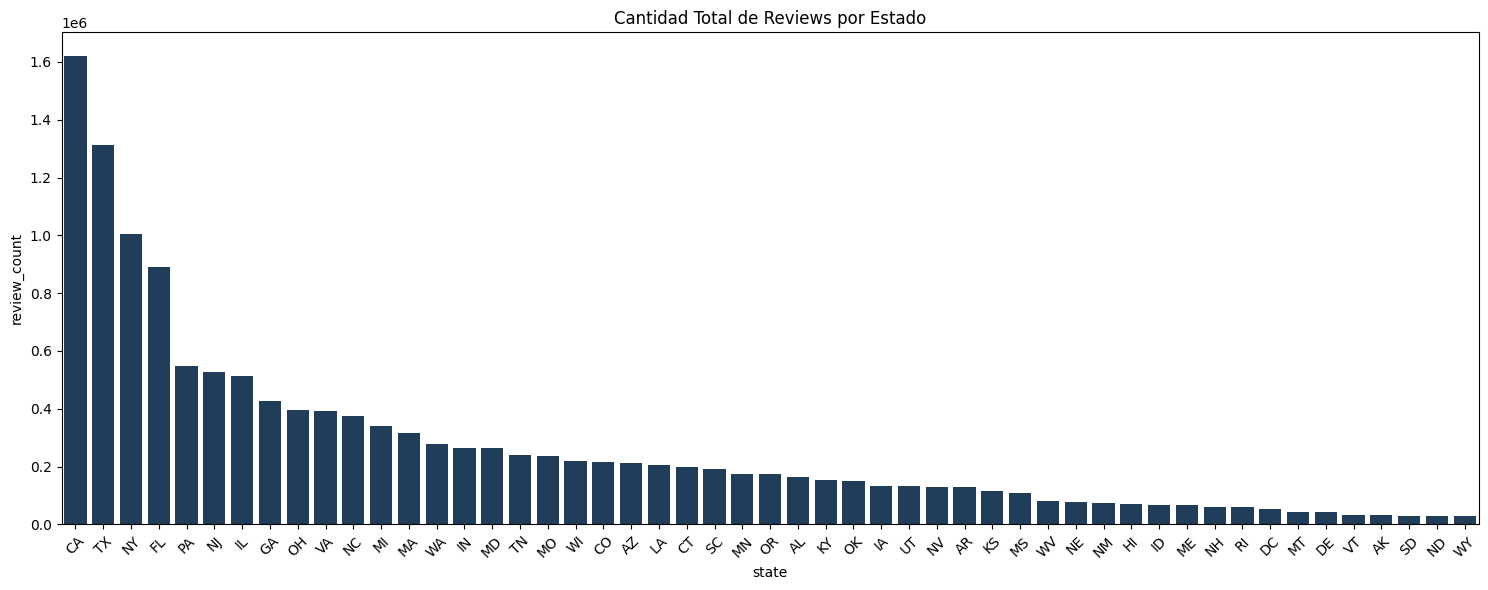

In [104]:
# 1. Sumar la cantidad de reviews por estado
reviews_by_state = df_completo.groupby('state', as_index=False)['review_count'].sum()

# Ordenar los estados por número de reviews para una mejor visualización
reviews_by_state = reviews_by_state.sort_values('review_count', ascending=False)

# 2. Graficar total de reviews por estado (barplot)
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='review_count', data=reviews_by_state, color='#163E64')  # Usamos el color de la paleta
plt.title('Cantidad Total de Reviews por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este gráfico podemos ver la cantidad de reviews por estado y se nota como hay una gran diferencia entre los mismos.

Se podría considerar prudente para una primera instancia del proyecto, trabajar con aquellos estados más ricos en datos para obtener un producto de mayor calidad.

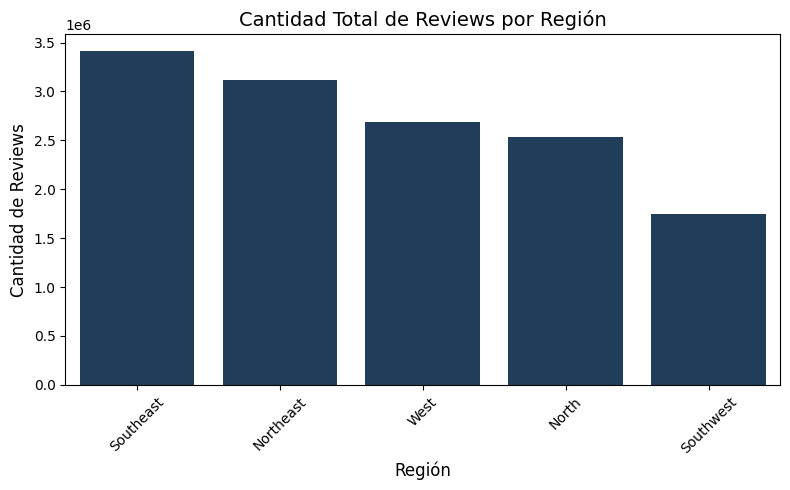

In [106]:
# 3. Definir el mapeo de estados a las 5 regiones
west_states = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "CO"]          # West
southwest_states = ["AZ", "NM", "TX", "OK"]                                  # Southwest
north_states = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]  # North
northeast_states = ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "PA", "NJ", "DE", "MD"]    # Northeast
southeast_states = ["FL", "GA", "SC", "NC", "TN", "KY", "WV", "VA", "DC", "AL", "MS", "AR", "LA"] # Southeast

state_to_region = {}

for s in west_states:
    state_to_region[s] = "West"
for s in southwest_states:
    state_to_region[s] = "Southwest"
for s in north_states:
    state_to_region[s] = "North"
for s in northeast_states:
    state_to_region[s] = "Northeast"
for s in southeast_states:
    state_to_region[s] = "Southeast"

# Añadir la columna región
reviews_by_state['region'] = reviews_by_state['state'].map(state_to_region)

# Eliminar cualquier estado que no se haya mapeado
reviews_by_state = reviews_by_state.dropna(subset=['region'])

# 4. Sumar reviews por región
reviews_by_region = reviews_by_state.groupby('region', as_index=False)['review_count'].sum()
reviews_by_region = reviews_by_region.sort_values('review_count', ascending=False)

# 5. Graficar por región
plt.figure(figsize=(8, 5))
sns.barplot(
    x='region', 
    y='review_count',  # Corregí la columna según tu data
    data=reviews_by_region, 
    color='#163E64'  # Usamos un solo color de la paleta
)
plt.title('Cantidad Total de Reviews por Región', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Cantidad de Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Para no tomar estados tan dispersos dentro del mapa de los Estados Unidos, evaluamos nombrar los estados más relevantes de las regiones con mayor número de reviews, en este caso la Southeast y la Northeast.

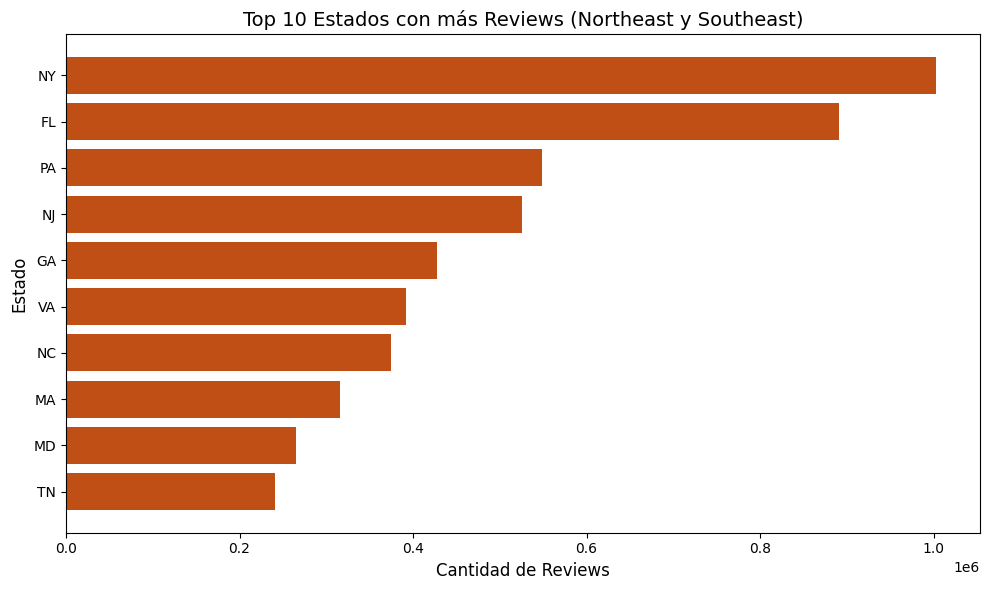

In [107]:
# 1. Filtrar sólo Northeast y Southeast
reviews_by_state = df_completo.groupby('state', as_index=False)['review_count'].sum()

reviews_by_state['region'] = reviews_by_state['state'].map(state_to_region)

df_ne_se = reviews_by_state[reviews_by_state['region'].isin(['Northeast', 'Southeast'])]

# 3. Ordenar por número de reviews y tomar los 10 con más reviews
top_10_states = df_ne_se.sort_values('review_count', ascending=False).head(10)

# 4. Crear un gráfico de barras horizontal con estos 10 estados
plt.figure(figsize=(10, 6))
plt.barh(top_10_states['state'], top_10_states['review_count'], color='#C04F15')  # Color de la paleta
plt.title('Top 10 Estados con más Reviews (Northeast y Southeast)', fontsize=14)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.gca().invert_yaxis()  # Invertimos el eje Y para que los valores más altos estén arriba
plt.tight_layout()
plt.show()


Aquí podemos ver los 10 estados con mayor densidad de reviews de la región este y su porcentaje con respecto a la muestra total.
Tomaremos estos estados como primera muestra para desarrollar nuestra primera versión.

In [108]:
# Filtrar solo los estados del top_10_states
df_filtered = df_completo[df_completo['state'].isin(top_10_states['state'])]

# Guardar el DataFrame filtrado en un nuevo Parquet
output_parquet_path = "../Data_cleaned/Google/metadata-sitios/filtered_top_10_states.parquet"
df_filtered.to_parquet(output_parquet_path, index=False)

print(f"Archivo Parquet creado: {output_parquet_path}")

Archivo Parquet creado: ../Data_cleaned/Google/metadata-sitios/filtered_top_10_states.parquet


In [109]:
df_completo = pd.read_parquet('../Data_cleaned/Google/metadata-sitios/filtered_top_10_states.parquet')

In [110]:
df_completo.head(3)

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
0,0x89c6c89efcaed69d:0xded973f6033e7dba,Vivi Bubble Tea,701 S 5th St,Philadelphia,PA,19147,39.940293,-75.150923,4.0,8,[Restaurant],None
1,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Cape Seafood Shack,603 Del Prado Blvd S,Cape Coral,FL,33990,26.641377,-81.940545,5.0,1,[Restaurant],None
2,0x88c2e4e34f1ed783:0x76c5da381c499d79,Fresh Point Country Buffet,10525 US-19,Pinellas Park,FL,33782,27.867489,-82.702971,5.0,2,[Buffet restaurant],"[[Thursday, 11AM–9PM], [Friday, 11AM–9PM], [Sa..."


In [111]:
print(df_completo.shape)
df_completo.isnull().sum()

(72351, 12)


gmap_id            0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
categories         0
hours           7290
dtype: int64

Al parecer hay alrededor de un 10% de restaurantes que no proporcionan información sobre su horario. Hay que evaluar cómo manejar estos datos faltantes. 
A la hora de evaluar un restaurante, habría que tener en cuenta el hecho de que no brinde este tipo de información valiosa para el usuario.

In [112]:
num_duplicados = df_completo.duplicated(subset='gmap_id').sum()
print(f"Número de gmap_id duplicados: {num_duplicados}")

Número de gmap_id duplicados: 367


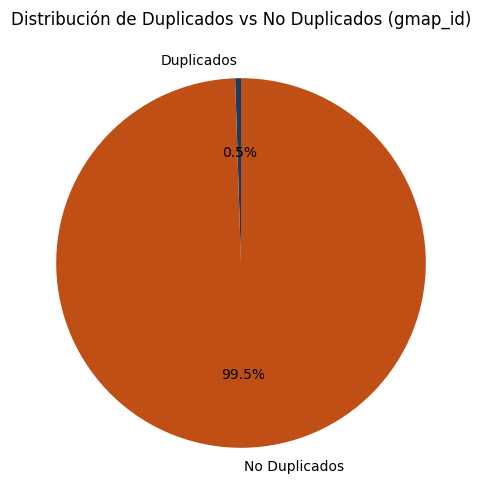

In [113]:
num_duplicados = df_completo.duplicated(subset='gmap_id').sum()
num_no_duplicados = len(df_completo) - num_duplicados

# Datos para el gráfico
labels = ['Duplicados', 'No Duplicados']
sizes = [num_duplicados, num_no_duplicados]
colors = ['#163E64', '#C04F15']

# Crear el diagrama circular
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de Duplicados vs No Duplicados (gmap_id)')
plt.show()

#### Debemos evaluar la razón por la cual exiten `gmap_id` duplicados cuando deberia ser un valor unico y hacer algo al respecto.

In [114]:
df_completo[df_completo.duplicated(subset='gmap_id', keep=False)].sort_values(by='gmap_id').head(10)

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
74,0x146c6711a70d7991:0xe478335f760c8ccc,Bar 91,400 Ave of the Champions,Palm Beach Gardens,FL,33418,26.828991,-80.141201,3.9,8,"[Bar & grill, Bar, Restaurant, Sports bar]","[[Wednesday, 6:30AM–9PM], [Thursday, 6:30AM–9P..."
441,0x146c6711a70d7991:0xe478335f760c8ccc,Bar 91,400 Ave of the Champions,Palm Beach Gardens,FL,33418,26.828991,-80.141201,3.9,8,"[Bar & grill, Bar, Restaurant, Sports bar]","[[Wednesday, 6:30AM–9PM], [Thursday, 6:30AM–9P..."
433,0x4ccab4b3af9c7c85:0x9defa19fe4e295c,Alpine Pizza,1104 U.S. 9,Schroon Lake,NY,12870,43.837433,-73.761254,4.3,45,[Pizza restaurant],"[[Wednesday, 4–9PM], [Thursday, 4–9PM], [Frida..."
66,0x4ccab4b3af9c7c85:0x9defa19fe4e295c,Alpine Pizza,1104 U.S. 9,Schroon Lake,NY,12870,43.837433,-73.761254,4.3,45,[Pizza restaurant],"[[Wednesday, 4–9PM], [Thursday, 4–9PM], [Frida..."
557,0x4ccd1ca666ff349b:0x3126349d5314b2ed,Black Lake Cafe,3371 County Rte 6,Hammond,NY,13646,44.523661,-75.591859,5.0,1,[American restaurant],None
190,0x4ccd1ca666ff349b:0x3126349d5314b2ed,Black Lake Cafe,3371 County Rte 6,Hammond,NY,13646,44.523661,-75.591859,5.0,1,[American restaurant],None
714,0x51325acc69cdd725:0xd9eab3bc5db69212,Lin's Asian Bistro,1075 Oakleaf Plantation Pkwy #305,Orange Park,FL,32065,30.161388,-81.835169,3.7,18,"[Chinese restaurant, Asian restaurant, Sushi r...","[[Tuesday, Closed], [Wednesday, 11AM–10PM], [T..."
347,0x51325acc69cdd725:0xd9eab3bc5db69212,Lin's Asian Bistro,1075 Oakleaf Plantation Pkwy #305,Orange Park,FL,32065,30.161388,-81.835169,3.7,18,"[Chinese restaurant, Asian restaurant, Sushi r...","[[Tuesday, Closed], [Wednesday, 11AM–10PM], [T..."
636,0x54ab5f4c1d29f075:0x60979db2ca1a5126,Nrgize,145 E Service Rd,Staten Island,NY,10314,40.588024,-74.191520,3.2,5,"[Juice shop, Breakfast restaurant, Cafe, Healt...","[[Wednesday, 8:30AM–10PM], [Thursday, 8:30AM–1..."
269,0x54ab5f4c1d29f075:0x60979db2ca1a5126,Nrgize,145 E Service Rd,Staten Island,NY,10314,40.588024,-74.191520,3.2,5,"[Juice shop, Breakfast restaurant, Cafe, Healt...","[[Wednesday, 8:30AM–10PM], [Thursday, 8:30AM–1..."


In [115]:
state_list = df_completo['state'].unique().tolist()

In [116]:
state_list

['PA', 'FL', 'NC', 'NY', 'TN', 'GA', 'MA', 'VA', 'NJ', 'MD']

#### Notamos que son los mismos restaurantes que están dos veces ya que tienen la misma información, por lo que nos quedamos solo con uno de estos dos.

In [117]:
df_completo = df_completo.drop_duplicates(subset='gmap_id', keep='first')

#### Observamos la distribución de calificaciones que existen

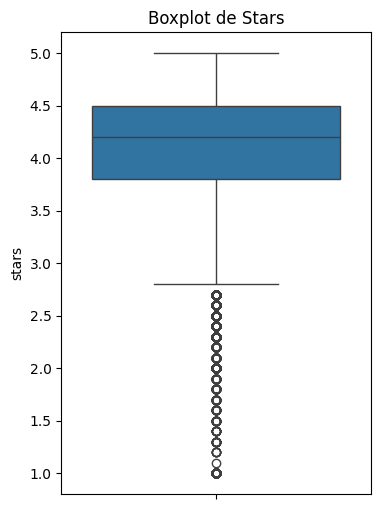

In [118]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df_completo['stars'])
plt.title('Boxplot de Stars')
plt.show()

El boxplot muestra que la mayoría de las calificaciones (stars) están concentradas entre aproximadamente 4.0 y 4.4 (caja), indicando una tendencia hacia puntuaciones altas. La mediana ronda el 4.0, reflejando que la mitad de los restaurantes tiene una puntuación igual o superior a este valor. Existe un grupo notable de valores más bajos (por debajo de 3.0) considerados como atípicos u outliers, pero en general, las reseñas tienden a ser positivas.

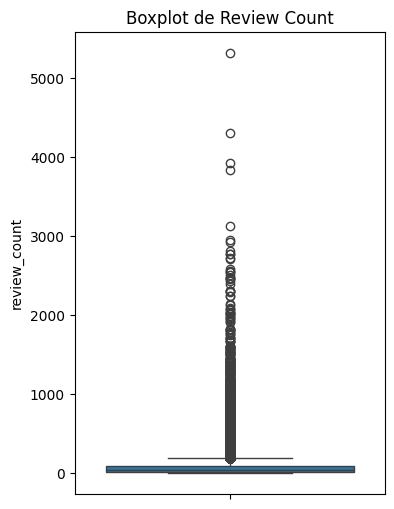

In [119]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df_completo['review_count'])
plt.title('Boxplot de Review Count')
plt.show()

In [120]:
num_reviews_0 = df_completo[df_completo['review_count'] == 0].shape[0]
print(f"Número de restaurantes con 0 reviews: {num_reviews_0}")

Número de restaurantes con 0 reviews: 0


Si bien no hay restorantes con 0 reviews, las reseñas están fuertemente concentradas cerca de valores muy bajos, con unos pocos restaurantes acumulando una enorme cantidad de reviews, generando numerosos outliers muy por encima de la mayoría.

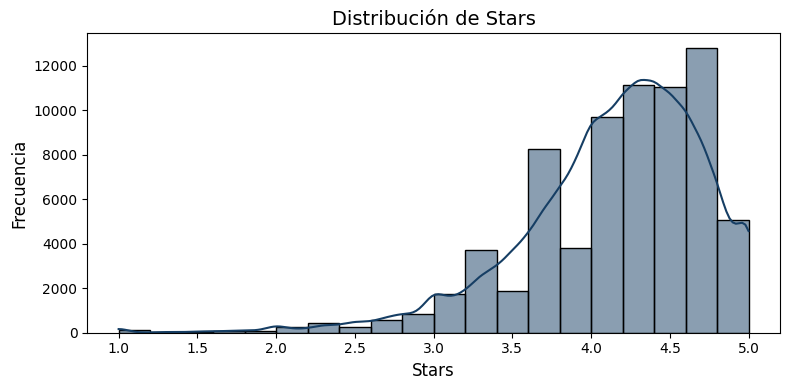

In [121]:
plt.figure(figsize=(8, 4))
sns.histplot(df_completo['stars'], kde=True, bins=20, color='#163E64')  # Color de la paleta
plt.title('Distribución de Stars', fontsize=14)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()


La distribución de las calificaciones está fuertemente sesgada hacia valores altos (entre 4.0 y 4.5), con pocos restaurantes con ratings muy bajos. Esto sugiere que la mayoría de los locales reciben evaluaciones mayormente positivas.

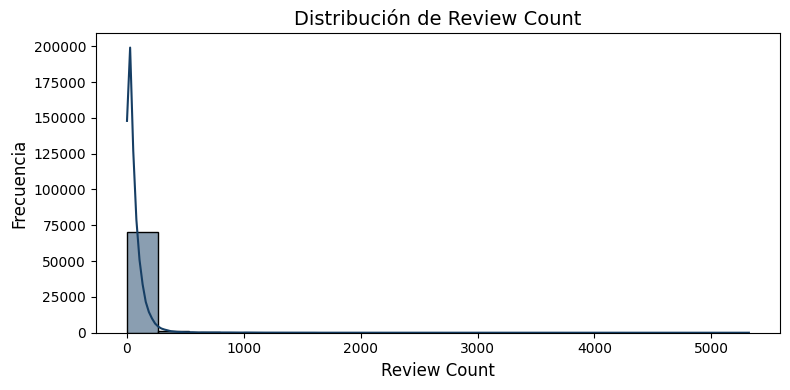

In [122]:
plt.figure(figsize=(8, 4))
sns.histplot(df_completo['review_count'], kde=True, bins=20, color='#163E64')  # Color de la paleta
plt.title('Distribución de Review Count', fontsize=14)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

La mayoría de los restaurantes tienen muy pocas reseñas, mientras que unos pocos acumulan cantidades excepcionalmente altas, generando una distribución fuertemente sesgada hacia la izquierda con una larga cola a la derecha.

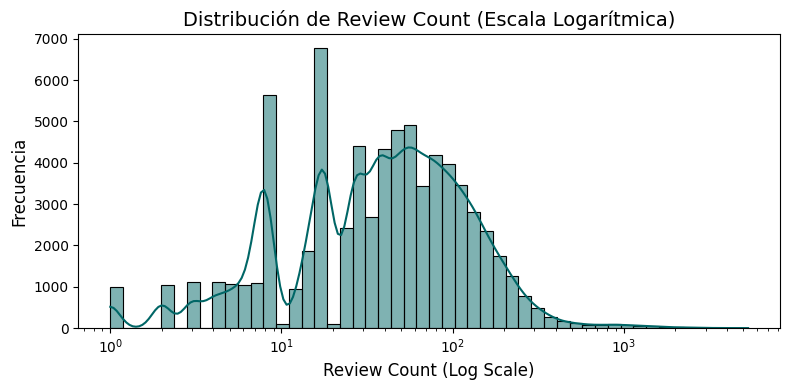

In [123]:
plt.figure(figsize=(8, 4))
sns.histplot(
    df_completo['review_count'].apply(lambda x: x if x > 0 else None), 
    kde=True, 
    log_scale=True, 
    bins=50, 
    color='#006666'  # Color de la paleta
)
plt.title('Distribución de Review Count (Escala Logarítmica)', fontsize=14)
plt.xlabel('Review Count (Log Scale)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()


Al representar la cantidad de reseñas en escala logarítmica se aprecia mejor la dispersión: la mayoría de los restaurantes acumulan entre 1 y 100 reseñas, con una distribución más uniforme al visualizar en log, y aún algunos con cantidades mucho mayores (más de 1000), evidenciando una concentración significativa en rangos bajos pero con una amplia variedad.

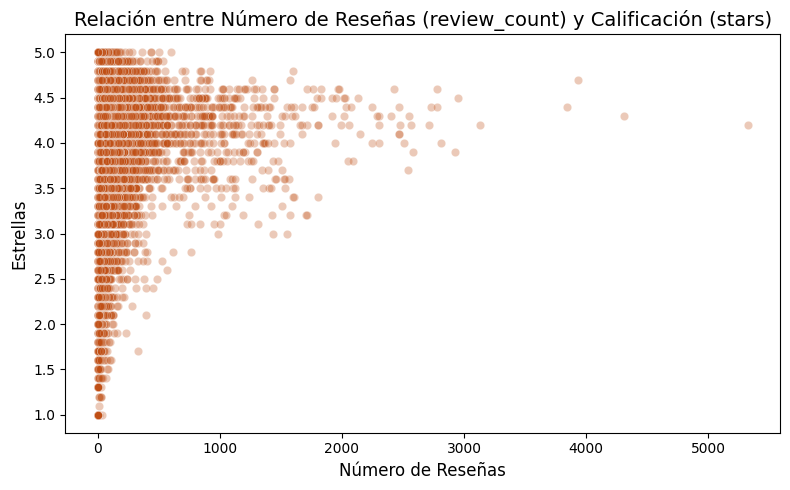

In [124]:
# 1. Gráfico de dispersión para ver la relación entre stars y review_count
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_completo, 
    x='review_count', 
    y='stars', 
    alpha=0.3, 
    color='#C04F15'  # Color de la paleta
)
plt.title('Relación entre Número de Reseñas (review_count) y Calificación (stars)', fontsize=14)
plt.xlabel('Número de Reseñas', fontsize=12)
plt.ylabel('Estrellas', fontsize=12)
plt.tight_layout()
plt.show()


Muestra que no existe una fuerte correlación entre el número de reseñas y las calificaciones promedio (stars). La mayoría de las calificaciones altas se concentran en restaurantes con pocas reseñas, mientras que los locales con muchas reseñas mantienen una dispersión controlada entre 3.5 y 5.

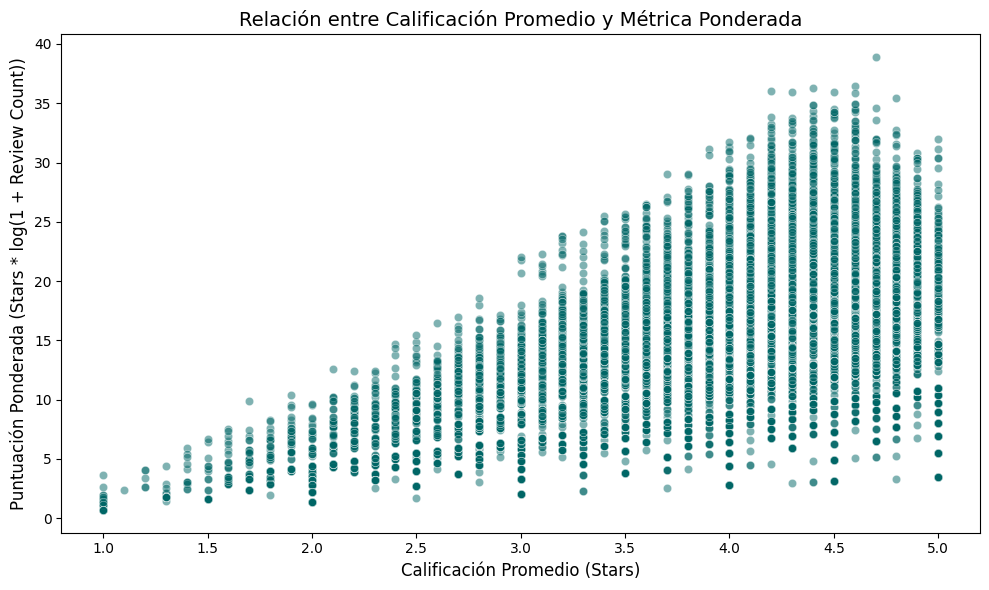

In [125]:
df_completo['weighted_score'] = df_completo['stars'] * np.log1p(df_completo['review_count'])

# 1. Gráfico de dispersión: Calificaciones promedio vs Métrica ponderada
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_completo, 
    x='stars', 
    y='weighted_score', 
    alpha=0.5, 
    color='#006666'  # Color de la paleta
)
plt.title('Relación entre Calificación Promedio y Métrica Ponderada', fontsize=14)
plt.xlabel('Calificación Promedio (Stars)', fontsize=12)
plt.ylabel('Puntuación Ponderada (Stars * log(1 + Review Count))', fontsize=12)
plt.tight_layout()
plt.show()


La métrica ponderada (calificación promedio ajustada por volumen de reseñas) evidencia que los restaurantes con altas calificaciones y un alto número de reseñas tienen valores significativamente mayores, diferenciándose de aquellos con pocas reseñas. Esto destaca la confiabilidad de calificaciones respaldadas por un mayor volumen.

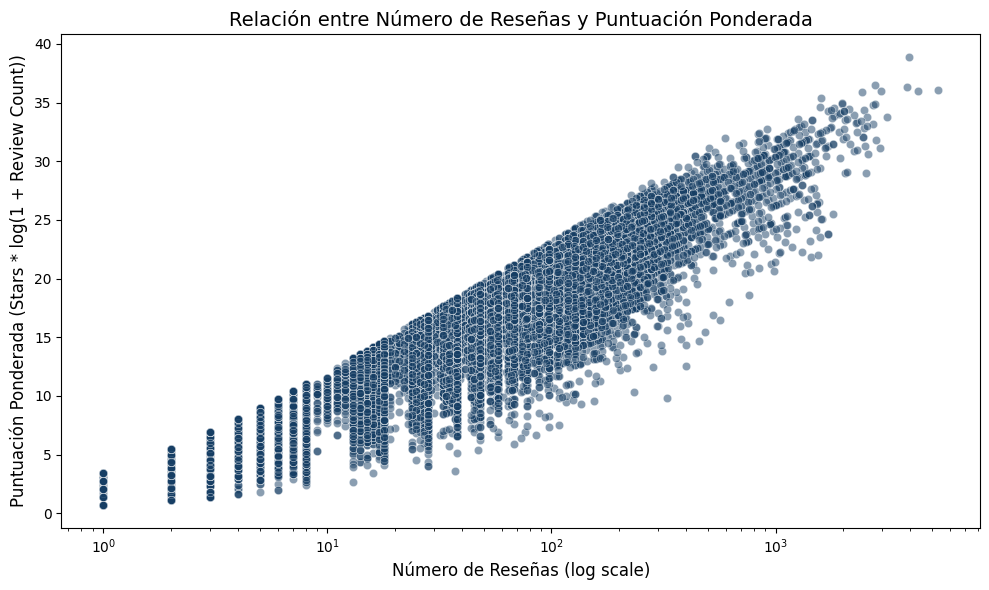

In [126]:
# 2. Gráfico combinado: Métrica ponderada vs Número de reseñas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_completo, 
    x='review_count', 
    y='weighted_score', 
    alpha=0.5, 
    color='#163E64'  # Color de la paleta
)
plt.xscale('log')  # Escala logarítmica para el número de reseñas
plt.title('Relación entre Número de Reseñas y Puntuación Ponderada', fontsize=14)
plt.xlabel('Número de Reseñas (log scale)', fontsize=12)
plt.ylabel('Puntuación Ponderada (Stars * log(1 + Review Count))', fontsize=12)
plt.tight_layout()
plt.show()

Utilizando la escala logarítmica para el número de reseñas, se observa una relación positiva clara entre el volumen de reseñas y la métrica ponderada. Esto refuerza que el impacto del número de reseñas es relevante para interpretar la calidad de las calificaciones, sobre todo en niveles superiores.

### Conclusión:
Los gráficos evidencian que las calificaciones promedio pueden ser engañosas sin considerar el volumen de reseñas. La métrica ponderada resuelve esta ambigüedad, mostrando que restaurantes con más reseñas y buenos ratings son más confiables y deben ser mejor valorados.

### Carga de los archivos dentro de la carpeta `reviews-estados`
Este conjunto de datos está distribuido en 51 carpetas (una por cada estado de EE. UU.), y contiene múltiples archivos JSON con reseñas de los usuarios. Cada reseña proporciona:

- **Información del usuario**: ID único y nombre.
- **Contenido de la reseña**:
  - Calificación numérica y texto descriptivo.
  - Imágenes relacionadas, si están disponibles.
- **Respuesta del comercio** (cuando aplica): Texto y tiempo de respuesta.
- **Referencia al comercio**: Identificador único del comercio (`gmap_id`).

La riqueza de este dataset radica en la perspectiva del cliente, permitiendo analizar sus opiniones, niveles de satisfacción y la interacción entre consumidores y comercios.

Debemos de filtrar nuestros archivos por una lista para que no existan errores de memoria debido a la cantidad de datos que existen de reviews

In [127]:
gmap_id_list = df_completo['gmap_id'].tolist()

In [128]:
# Ruta a la carpeta "review-estados"
folder_path = "../Datasets/Google/reviews-estados"

# Carpeta de salida
output_folder = "../Data_cleaned/Google/reviews-filtered"

# Ejecutar la función y obtener el DataFrame limpio
merged_df = clean_and_merge_reviews(folder_path, output_folder, gmap_id_list)

# Guardar el DataFrame combinado en un archivo final
final_output_path = os.path.join(output_folder, "merged_reviews_clean.parquet")
merged_df.to_parquet(final_output_path, index=False)

print(f"El DataFrame combinado fue guardado en: {final_output_path}")

En el estado Alabama se eliminaron 0 duplicados y 0 valores nulos.
Datos del estado Alabama guardados en ../Data_cleaned/Google/reviews-filtered\Alabama_cleaned.parquet
En el estado Alaska se eliminaron 0 duplicados y 0 valores nulos.
Datos del estado Alaska guardados en ../Data_cleaned/Google/reviews-filtered\Alaska_cleaned.parquet
En el estado Arizona se eliminaron 0 duplicados y 0 valores nulos.
Datos del estado Arizona guardados en ../Data_cleaned/Google/reviews-filtered\Arizona_cleaned.parquet
En el estado Arkansas se eliminaron 0 duplicados y 0 valores nulos.
Datos del estado Arkansas guardados en ../Data_cleaned/Google/reviews-filtered\Arkansas_cleaned.parquet
En el estado California se eliminaron 0 duplicados y 0 valores nulos.
Datos del estado California guardados en ../Data_cleaned/Google/reviews-filtered\California_cleaned.parquet
En el estado Colorado se eliminaron 0 duplicados y 0 valores nulos.
Datos del estado Colorado guardados en ../Data_cleaned/Google/reviews-filtered

In [129]:
reviews_df = pd.read_parquet('../Data_cleaned/Google/reviews-filtered/merged_reviews_clean.parquet')

In [130]:
reviews_df.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,113068308323231430437,Edwin Ashurst,1537195868022,5,The salads were lackluster though with well wr...,null,null,0x8894b5a7a7909725:0xe4687299fd288188
1,105941553219163737304,Douglas Gummere,1537402367631,1,"Love this place. Great little restaurant, with...",null,null,0x8894b5a7a7909725:0xe4687299fd288188
2,109857700811373231502,David Powell,1534936396392,5,A classy restaurant to match the charm of the ...,null,null,0x8894b5a7a7909725:0xe4687299fd288188


In [131]:
print(reviews_df.shape)
print(reviews_df.dtypes)

(7307157, 8)
user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object


#### Determinamos la cantidad de valores nulos 

In [132]:
# Reemplazar strings 'null' y valores vacíos por NaN
reviews_df['pics'] = reviews_df['pics'].replace(['null', ''], np.nan)
reviews_df['resp'] = reviews_df['resp'].replace(['null', ''], np.nan)

# Verificar valores nulos nuevamente
print(f"Valores nulos en 'pics': {reviews_df['pics'].isnull().sum()}")
print(f"Valores nulos en 'resp': {reviews_df['resp'].isnull().sum()}")


Valores nulos en 'pics': 7036992
Valores nulos en 'resp': 6625938


In [133]:
print(reviews_df.isnull().sum())

user_id          0
name             0
time             0
rating           0
text       2954217
pics       7036992
resp       6625938
gmap_id          0
dtype: int64


## Conclusión sobre los Datos Nulos

- **`text` (40.43% nulo):**  
  La ausencia de texto en una proporción significativa de las reseñas limita los análisis basados en contenido (como análisis de sentimiento). Podríamos:
  - Mantener las filas con texto para análisis específicos.
  - Usar las demás columnas (rating, fecha, etc.) para otras evaluaciones.

- **`pics` (96.30% nulo):**  
  La mayoría de las reseñas no contienen imágenes, lo cual es común. Dado su bajo impacto, podemos ignorar esta columna para análisis iniciales o excluirla directamente.

- **`resp` (90.68% nulo):**  
  La mayoría de las reseñas no tienen respuesta del restaurante. Esto podría usarse para evaluar el compromiso de los locales que sí responden, pero no afecta análisis generales.

- **Acción General:**  
  - Para columnas críticas (`text`), filtrar o imputar según el análisis.
  - Para columnas como `pics` y `resp`, considerarlas opcionales o excluirlas según el caso.


#### Determinamos la cantidad de valores duplicados en nuestro dataframe

In [134]:
print(reviews_df.duplicated(subset=['user_id', 'gmap_id', 'time']).sum())

4871579


### Distribución de Ratings

- **Descripción General:**
  - La mayoría de las reseñas tienen calificaciones altas, con una concentración significativa en el valor 5.
  - Los ratings de 4 a 4.5 también son comunes, lo que refuerza la tendencia hacia evaluaciones positivas.

- **Observaciones:**
  - Las calificaciones bajas (1 y 2) son mucho menos frecuentes, lo que sugiere que los usuarios tienden a dejar comentarios positivos más que negativos.
  - Existe un sesgo claro hacia los ratings altos, lo que podría deberse a la satisfacción general de los clientes o a que los usuarios insatisfechos dejan reseñas con menor frecuencia.

- **Implicaciones:**
  - Este sesgo hacia calificaciones altas puede influir en los modelos de recomendación, ya que podría ser necesario normalizar o ajustar los datos para reducir su impacto.
  - Sería interesante analizar los textos de reseñas negativas (1-2) para entender los motivos de las bajas calificaciones y compararlos con los positivos.


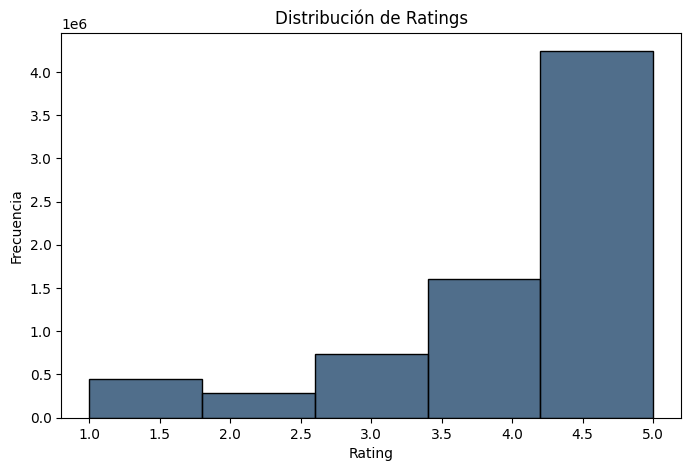

In [135]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews_df['rating'], bins=5, kde=False, color='#163E64')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

#### Distribución de la Longitud de las Reseñas

- **Observaciones:**
  - La mayoría de las reseñas son muy cortas (menos de 200 caracteres).
  - Existen pocas reseñas largas, lo que indica que la mayoría de usuarios dejan comentarios breves.

- **Implicaciones:**
  - Las reseñas largas pueden contener información más detallada y valiosa para análisis de sentimiento.


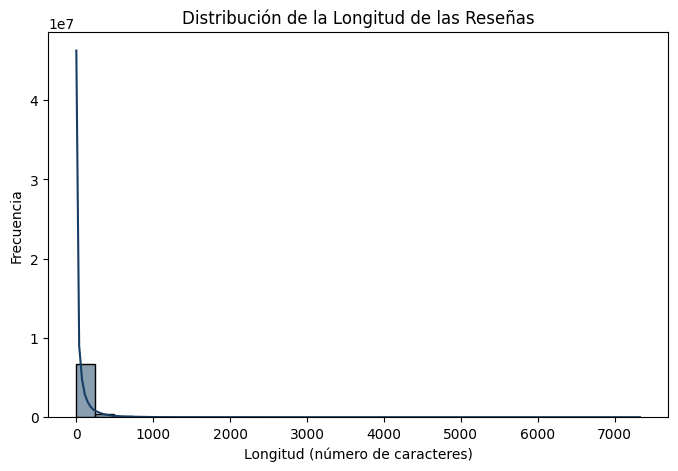

count    7.307157e+06
mean     7.452398e+01
std      1.549773e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.100000e+01
75%      8.200000e+01
max      7.329000e+03
Name: text_length, dtype: float64


In [136]:
reviews_df['text_length'] = reviews_df['text'].fillna('').apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(reviews_df['text_length'], bins=30, kde=True, color='#163E64')
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud (número de caracteres)')
plt.ylabel('Frecuencia')
plt.show()

# Resumen estadístico de la longitud
print(reviews_df['text_length'].describe())


#### Distribución de Reseñas por Año

- **Observaciones:**
  - Las reseñas aumentaron significativamente desde 2016, alcanzando su punto máximo en 2019.
  - Hay una caída visible en 2020, probablemente debido al impacto de la pandemia.

- **Implicaciones:**
  - Este crecimiento sugiere mayor adopción de plataformas de reseñas en los últimos años.
  - La caída en 2020 podría influir en tendencias y análisis relacionados con la actividad en restaurantes.

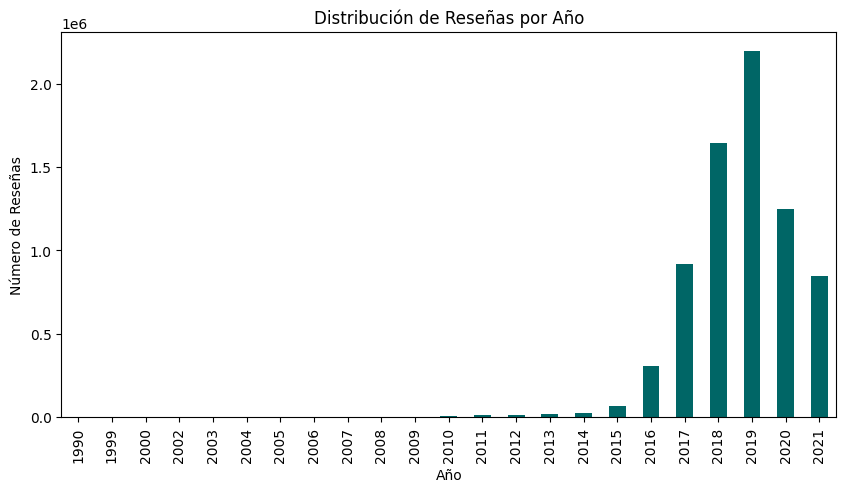

In [137]:
reviews_df['date'] = pd.to_datetime(reviews_df['time'], unit='ms')

plt.figure(figsize=(10, 5))
reviews_df['date'].dt.year.value_counts().sort_index().plot(kind='bar', color='#006666')
plt.title('Distribución de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.show()

#### Distribución de Reseñas por Hora del Día

- **Observaciones:**
  - Hay un pico significativo de actividad en la hora **0 (medianoche)**, seguido de una disminución constante durante las primeras horas de la madrugada.
  - La actividad comienza a aumentar nuevamente alrededor del mediodía, alcanzando niveles consistentes durante las horas de la tarde y noche, con otro pico importante a las **23:00 horas**.

- **Implicaciones:**
  - La alta actividad durante la medianoche podría estar asociada con usuarios que publican reseñas al finalizar el día.
  - El incremento sostenido en la tarde y noche sugiere que las reseñas están vinculadas a experiencias recientes, como cenas o visitas a establecimientos.
  - Estos patrones pueden ser útiles para estrategias de marketing que aprovechen momentos de alta actividad para maximizar la visibilidad de las reseñas.

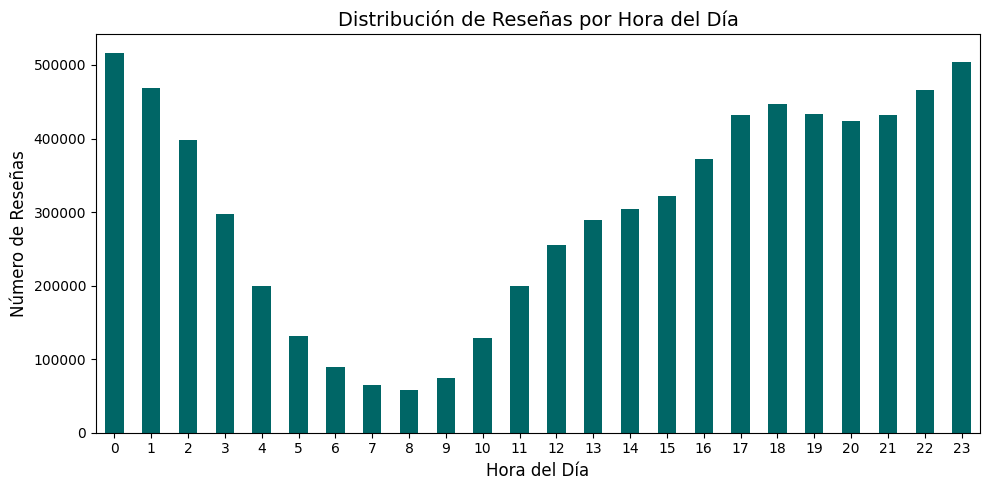

In [139]:
# Convertir la columna 'time' a un formato datetime si no lo está ya
reviews_df['date'] = pd.to_datetime(reviews_df['time'], unit='ms')

# Extraer la hora del día
hourly_reviews = reviews_df['date'].dt.hour.value_counts().sort_index()

# Generar el gráfico de barras por hora del día
plt.figure(figsize=(10, 5))
hourly_reviews.plot(kind='bar', color='#006666')  # Usamos el color de la paleta
plt.title('Distribución de Reseñas por Hora del Día', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Número de Reseñas', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=range(0, 24), rotation=0)  # Aseguramos etiquetas para las 24 horas
plt.tight_layout()
plt.show()


## Distribución de Reseñas por Usuario

- **Observaciones:**
  - La mayoría de los usuarios publican solo una reseña.
  - Un pequeño grupo de usuarios publica muchas reseñas (superusuarios).

- **Implicaciones:**
  - Los superusuarios podrían tener un peso desproporcionado en los análisis de tendencias y modelos de recomendación.


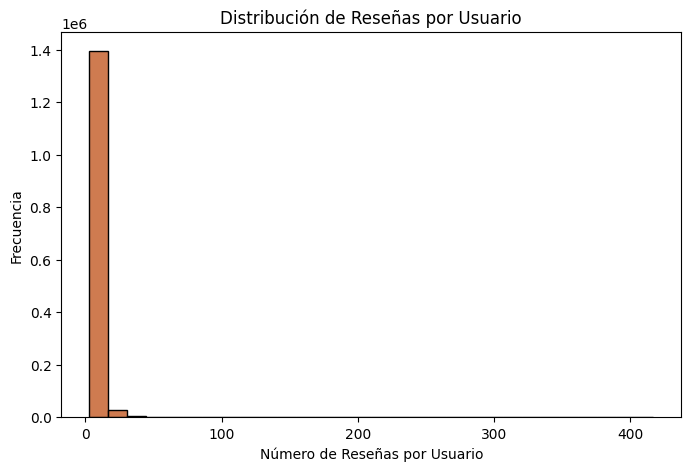

In [138]:
user_reviews_count = reviews_df['user_id'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(user_reviews_count, bins=30, kde=False, color='#C04F15')
plt.title('Distribución de Reseñas por Usuario')
plt.xlabel('Número de Reseñas por Usuario')
plt.ylabel('Frecuencia')
plt.show()
